In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(rc={
    "figure.figsize": (16, 9)
})

In [3]:
df = pd.read_csv("kw_2024_11_12_02_54.csv")

In [4]:
df.head()

,full_name,text_body,author_name,votes,responds_to,parent_submission_name,submission_flair,created_timestamp,parsed_timestamp,controversiality
0,t3_un1z9w,Sri Lankan opposition leader Sajith Premadasa ...,t2_63oe5kpm,179,NaN,t3_un1z9w,NaN,1.652245e+09,1731353678,False
1,t1_i868ljo,Look at this dudes car !! Has he ever had a jo...,NaN,36,t3_un1z9w,t3_un1z9w,NaN,1.652245e+09,1731353680,False
2,t1_i86ogbn,Anyone with half a brain knows this guy is a p...,t2_96ecn1c5,26,t3_un1z9w,t3_un1z9w,NaN,1.652245e+09,1731353680,False
3,t1_i85t3da,Why is there some blind arab man trying to cro...,t2_8ctz6ggl,43,t3_un1z9w,t3_un1z9w,NaN,1.652245e+09,1731353680,False
4,t1_i85mb6t,/r/praisethecameraman,t2_684r0o1z,23,t3_un1z9w,t3_un1z9w,NaN,1.652245e+09,1731353680,False


### Описание столбцов
1. *full_name* - Идентификатор текстовой записи (публикация или комментарий). Тип: строка.
2. *text_body* - Текстовое содержание записи, кодированное в UTF-8. Может содержать несвязный текст или текст на языке, отличном от английского. Может содержать пропуски (автор удалил аккаунт или комментарий). Тип: строка.
3. *author_name* - Идентификатор автора текстовой записи. Может содержать пропуски (автор удалил аккаунт). Тип: строка.
4. *votes* - Рейтинг записи. Тип: число.
5. *responds_to* - Идентификатор записи, на которую отвечает данная. Может содержать пропуски (запись является корневой публикацией). Тип: строка.
6. *parent_submission_name* - Идентификатор публикации, в дереве которой находится данная запись. Может содержать пропуски (запись является корневой публикацией). Тип: строка.
7. *submission_flair* - Категория текстовой записи. Единая для всего дерева публикации. Тип: строка
8. *created_timestamp* - UNIX метка времени создания записи по данным Reddit. Тип: число
9. *parsed_timestamp* - UNIX метка времени сохранения записи парсером. Тип: число
10. *controversiality* - Отметка о спорности публикации по данным Reddit. Тип: булев

Использованные ключевые слова:
1. 2022
2. colombo
3. cost
4. crisis
5. economic
6. galle
7. gota
8. gotabaya 
9. kohuwala
10. martial
11. mirihana
12. protest
13. rajapaksa
14. riot
15. sjb
16. storm


In [5]:
print(f"Row count: {df.shape[0]}")

print(f"Unique rows: {df["full_name"].nunique()}")
print(f"Unique authors (including null value): {df["author_name"].nunique()}")
print(f"Unique submissions (not comments): {df["parent_submission_name"].nunique()}")

Row count: 30559
Unique rows: 24606
Unique authors (including null value): 4391
Unique submissions (not comments): 1569


In [6]:
df.drop_duplicates(subset="full_name", inplace=True, ignore_index=True)

In [7]:
print(f"Row count: {df.shape[0]}")

print(f"Unique rows: {df["full_name"].nunique()}")
print(f"Unique authors (including null value): {df["author_name"].nunique()}")
print(f"Unique submissions (not comments): {df["parent_submission_name"].nunique()}")

Row count: 24606
Unique rows: 24606
Unique authors (including null value): 4391
Unique submissions (not comments): 1569


In [8]:
df["submission_flair"].value_counts()

submission_flair
Discussion                 19
Rumour Disproven           14
Repetitive Topic           13
News                        8
Translation in comments     6
Editorialized Title         1
Sports                      1
Name: count, dtype: int64

### Признак controversiality 

In [9]:
df["controversiality"].value_counts()

controversiality
False    24006
True       600
Name: count, dtype: int64

In [10]:
def build_replies_up(df: pd.DataFrame, starting_node: pd.DataFrame) -> list[str]:
    out = [starting_node["text_body"]]
    next_parent = starting_node["responds_to"]

    while isinstance(next_parent, str):
        node = df[df["full_name"] == next_parent]
        out.append(node.iloc[0]['text_body'])
        next_parent = node.iloc[0]['responds_to']

    return list(reversed(out))

In [11]:
def print_replies(start_id: int) -> None:
    for i in build_replies_up(df, df.iloc[start_id]):
        print(i)
        print("="*20)

### Признак votes

In [12]:
df["votes"].describe()

count    24606.000000
mean         5.990937
std         19.460760
min        -58.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1276.000000
Name: votes, dtype: float64

<Axes: xlabel='votes', ylabel='Count'>

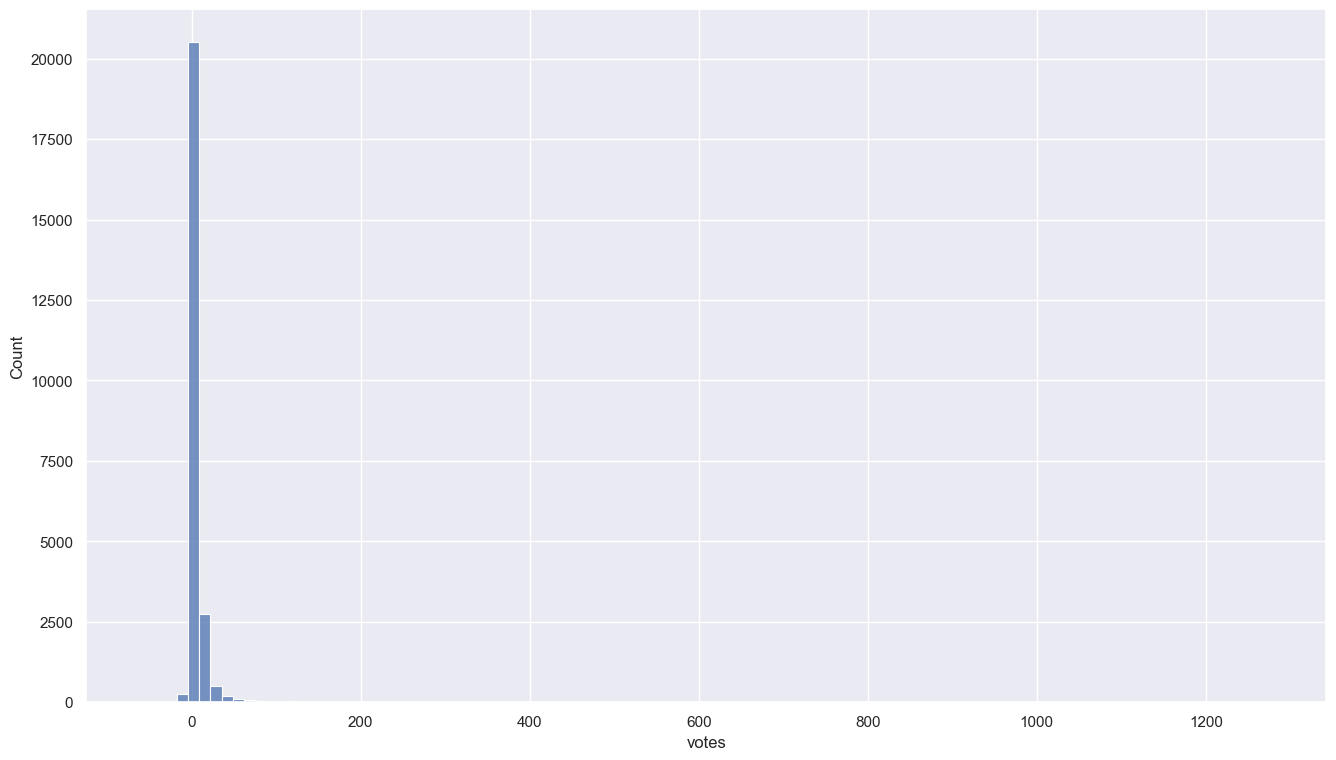

In [13]:
sns.histplot(data=df, x="votes", bins=100)

[(0.0, 100.0)]

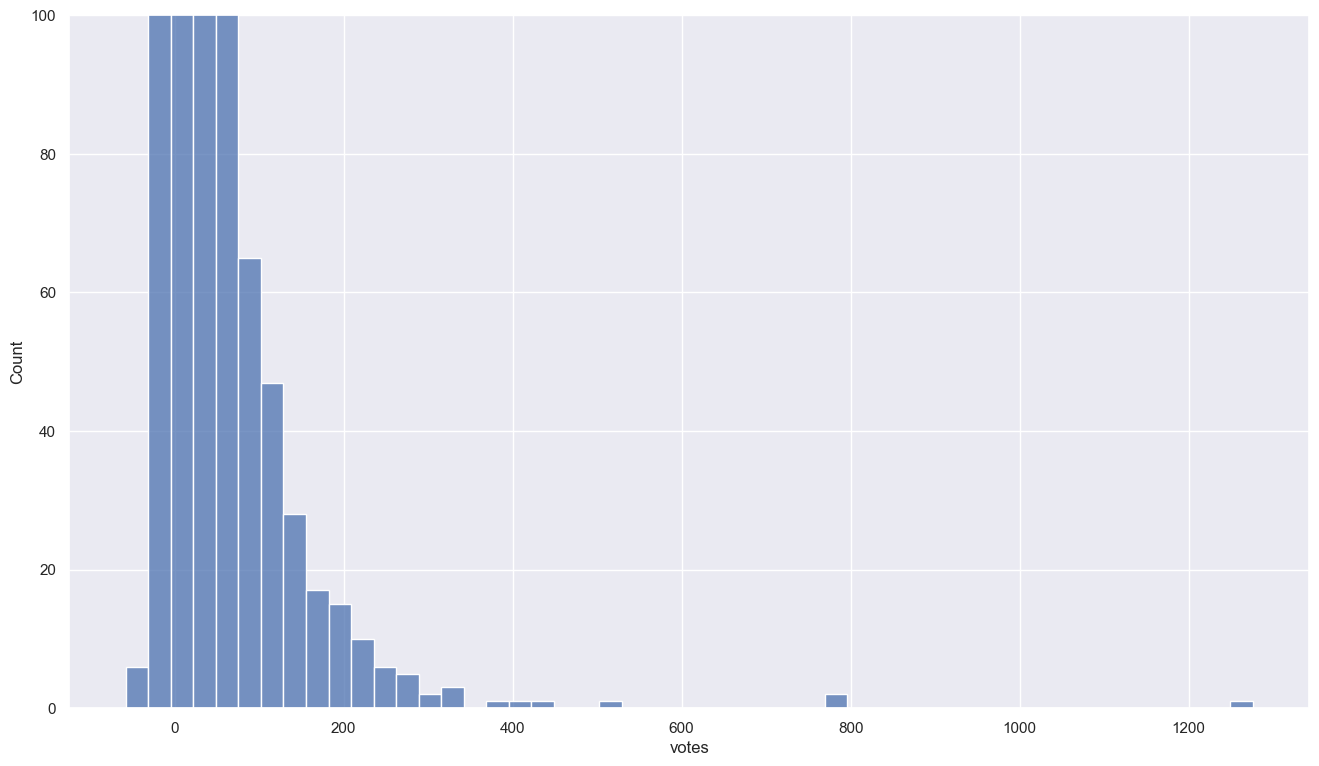

In [14]:
ax = sns.histplot(data=df, x="votes", bins=50)
ax.set(ylim=(0, 100))

In [15]:
print(f"99th quantile of votes: {df["votes"].quantile(0.99)}")

99th quantile of votes: 65.0


In [17]:
print(f"90th quantile of votes: {df["votes"].quantile(0.90)}")

90th quantile of votes: 12.0


### Признак created_timestamp

In [18]:
from datetime import datetime

In [19]:
df["created_datetime"] = df["created_timestamp"].apply(
    lambda x: datetime.fromtimestamp(x)
)

In [20]:
df["created_datetime"].min()

Timestamp('2012-09-18 20:40:11')

In [21]:
df["created_datetime"].max()

Timestamp('2023-06-10 11:42:20')

In [22]:
df["year"] = df["created_datetime"].apply(
    lambda x: x.year
)

In [25]:
df.groupby("year").size()

year
2012        8
2013       73
2014      108
2015       56
2016      197
2017      257
2018      553
2019     3042
2020     1718
2021     3758
2022    12337
2023     2499
dtype: int64

In [24]:
df.groupby("year")["votes"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2012,8.0,2.625000,1.597990,1.0,1.75,2.0,3.50,5.0
2013,73.0,2.808219,2.252514,-1.0,1.00,2.0,4.00,12.0
2014,108.0,2.990741,2.666845,0.0,1.00,2.0,4.00,13.0
2015,56.0,2.553571,3.044635,-6.0,1.00,2.0,3.25,11.0
2016,197.0,2.213198,2.772906,-4.0,1.00,2.0,3.00,23.0
2017,257.0,2.926070,3.379393,-6.0,1.00,2.0,3.00,24.0
2018,553.0,3.452080,5.405811,-12.0,1.00,2.0,3.00,57.0
2019,3042.0,4.072978,8.569921,-16.0,1.00,2.0,5.00,193.0
2020,1718.0,5.662980,14.417073,-23.0,1.00,2.0,5.00,226.0
